In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedShuffleSplit

In [5]:
data=pd.read_csv("DPD_Att_Classifier.csv")
data.head()

,Directory,File,DesignPattern,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,...,Feature_290,Feature_291,Feature_292,Feature_293,Feature_294,Feature_295,Feature_296,Feature_297,Feature_298,Feature_299
0,111,AbstractFactory,AbstractFactory,0.023346,-0.059852,-0.046176,-0.097405,-0.044382,-0.012018,-0.005196,...,-0.112120,-0.044441,-0.052856,0.090196,0.121308,0.013891,-0.010730,-0.110684,0.001927,-0.065017
1,111,DPAbstractFactory,Unknown,-0.010441,-0.057699,-0.043226,-0.051360,-0.076978,-0.026927,-0.028718,...,-0.114367,-0.098888,-0.042778,0.084722,0.167180,0.040148,-0.095231,-0.020824,-0.011934,-0.075166
2,111,FactoryNotebookGamer,AbstractFactory,-0.024173,-0.085740,-0.110586,-0.093645,-0.067076,-0.074021,-0.015681,...,-0.178159,-0.066261,-0.011634,0.030901,0.066849,0.049524,-0.031129,-0.088362,0.020524,-0.123357
3,111,FactoryNotebookOfficeW,Unknown,-0.009756,-0.040580,-0.070110,-0.109534,-0.032864,-0.052202,0.030639,...,-0.152608,-0.119599,-0.025784,0.095495,0.114170,-0.024063,-0.038113,-0.122671,0.016256,-0.132930
4,111,FactoryProvider,AbstractFactory,-0.053560,-0.034661,-0.000312,-0.008642,-0.062671,-0.077100,-0.033547,...,-0.109249,-0.104436,0.016781,0.051911,0.097571,0.003386,-0.081571,-0.085006,-0.018682,-0.095018


In [6]:
data["DesignPattern"].unique()

array(['AbstractFactory', 'Unknown', nan, 'Facade', 'Adapter', 'Memento',
       'Singleton', 'Proxy', 'Prototype', 'Observer', 'Decorator',
       'FactoryMethod', 'Builder', 'Visitor', 'Strategy'], dtype=object)

In [7]:
data["DesignPattern"].value_counts()

DesignPattern
Prototype          127
Observer           127
Strategy           127
Memento            107
Adapter            106
Decorator          105
Singleton          101
Builder            101
FactoryMethod      100
Facade              99
Visitor             98
AbstractFactory     97
Proxy               96
Unknown             75
Name: count, dtype: int64

In [8]:
data['DesignPattern'].fillna('Unknown', inplace=True)
data["DesignPattern"].value_counts()

DesignPattern
Unknown            163
Prototype          127
Observer           127
Strategy           127
Memento            107
Adapter            106
Decorator          105
Singleton          101
Builder            101
FactoryMethod      100
Facade              99
Visitor             98
AbstractFactory     97
Proxy               96
Name: count, dtype: int64

In [9]:
import pandas as pd

# Assuming 'data' is your DataFrame with the dataset
unknown_class = data[data['DesignPattern'] == 'Unknown']

# Randomly sample 130 instances from the "Unknown" class
sampled_unknown = unknown_class.sample(n=130, random_state=42)

# Create a DataFrame with the other classes
other_classes = data[data['DesignPattern'] != 'Unknown']

# Concatenate the sampled "Unknown" class with the other classes
data = pd.concat([sampled_unknown, other_classes])

# Now, 'final_dataset' contains only 130 instances of the "Unknown" class

data["DesignPattern"].value_counts()

DesignPattern
Unknown            130
Prototype          127
Observer           127
Strategy           127
Memento            107
Adapter            106
Decorator          105
Singleton          101
Builder            101
FactoryMethod      100
Facade              99
Visitor             98
AbstractFactory     97
Proxy               96
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'pattern' is the target column
label_encoder = LabelEncoder()
data['pattern_encoded'] = label_encoder.fit_transform(data['DesignPattern'])


In [11]:
y = data['pattern_encoded']
X = data.drop(['DesignPattern', 'pattern_encoded','Directory','File'], axis=1)  # Features

In [12]:
from sklearn.model_selection import KFold
import pandas as pd

# Assuming X and y are pandas DataFrames or Series
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
import pandas as pd

# Assuming X and y are pandas DataFrames or Series
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize different classifiers
classifiers = {
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
}

# Initialize dictionaries to store evaluation metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Perform cross-validation
for name, classifier in classifiers.items():
    accuracy_scores[name] = []
    precision_scores[name] = []
    recall_scores[name] = []
    f1_scores[name] = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        # Calculate and store metrics for each fold
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        accuracy_scores[name].append(accuracy)
        precision_scores[name].append(precision)
        recall_scores[name].append(recall)
        f1_scores[name].append(f1)

# Calculate average metrics across folds
for name in classifiers:
    avg_accuracy = sum(accuracy_scores[name]) / len(accuracy_scores[name])
    avg_precision = sum(precision_scores[name]) / len(precision_scores[name])
    avg_recall = sum(recall_scores[name]) / len(recall_scores[name])
    avg_f1 = sum(f1_scores[name]) / len(f1_scores[name])

    print(f'{name} Metrics (Average Across Folds):')
    print(f'Average Accuracy: {avg_accuracy:.2f}')
    print(f'Average Precision (Macro): {avg_precision:.2f}')
    print(f'Average Recall (Macro): {avg_recall:.2f}')
    print(f'Average F1-Score (Macro): {avg_f1:.2f}')
    print('-' * 30)


Support Vector Machine Metrics (Average Across Folds):
Average Accuracy: 0.85
Average Precision (Macro): 0.86
Average Recall (Macro): 0.86
Average F1-Score (Macro): 0.85
------------------------------
Logistic Regression Metrics (Average Across Folds):
Average Accuracy: 0.81
Average Precision (Macro): 0.82
Average Recall (Macro): 0.82
Average F1-Score (Macro): 0.81
------------------------------
Multi-layer Perceptron Metrics (Average Across Folds):
Average Accuracy: 0.83
Average Precision (Macro): 0.84
Average Recall (Macro): 0.84
Average F1-Score (Macro): 0.84
------------------------------


In [14]:
from sklearn.metrics import classification_report


# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Print the classification report
    report = classification_report(y_test, y_pred, target_names=["Singleton","Observer","Memento","Proxy","Prototype","Builder","AbstractFactory","FactoryMethod","Facade","Adapter","Decorator","Visitor","Unknown","Strategy"])
    print(f'{name} Classification Report:\n{report}')
    print('-' * 30)


Support Vector Machine Classification Report:
                 precision    recall  f1-score   support

      Singleton       0.75      1.00      0.86        18
       Observer       0.95      1.00      0.97        18
        Memento       0.71      1.00      0.83        15
          Proxy       0.94      0.94      0.94        16
      Prototype       0.91      0.88      0.89        24
        Builder       0.90      0.45      0.60        20
AbstractFactory       1.00      0.92      0.96        26
  FactoryMethod       0.90      1.00      0.95        27
         Facade       0.76      0.83      0.79        23
        Adapter       0.91      0.95      0.93        22
      Decorator       0.88      0.75      0.81        20
        Visitor       0.81      0.87      0.84        30
        Unknown       0.67      0.60      0.63        20
       Strategy       1.00      0.88      0.94        25

       accuracy                           0.86       304
      macro avg       0.86      0.86    

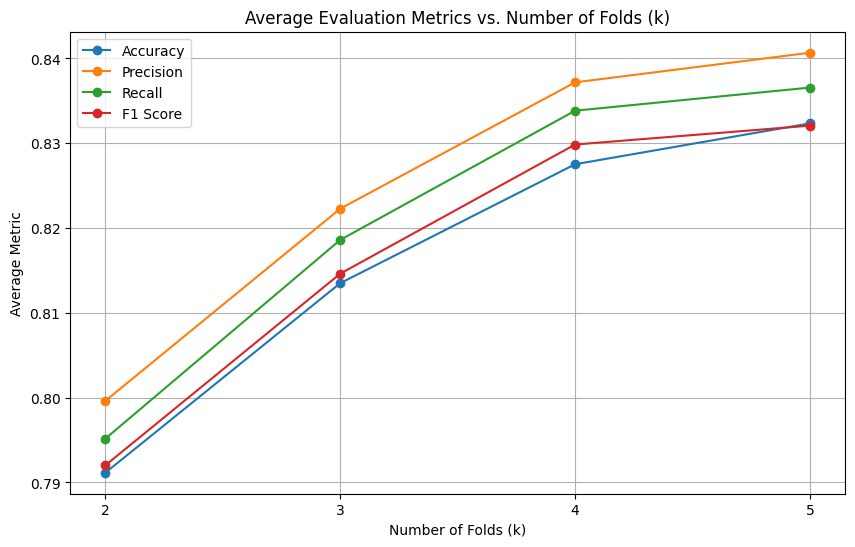

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Assuming X and y are pandas DataFrames or Series
# Initialize different classifiers
classifiers = {
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
}

# Define the range of k-fold values
k_values = range(2, 6)  # Vary from 2 to 5

# Initialize dictionaries to store average metrics for each k-fold value
avg_metrics = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

# Perform cross-validation for each k-fold value
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    metrics_per_k = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': []
    }

    for name, classifier in classifiers.items():
        all_fold_metrics = {
            'accuracy': [],
            'precision': [],
            'recall': [],
            'f1': []
        }

        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)

            # Calculate and store metrics for each fold
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='macro')
            recall = recall_score(y_test, y_pred, average='macro')
            f1 = f1_score(y_test, y_pred, average='macro')

            all_fold_metrics['accuracy'].append(accuracy)
            all_fold_metrics['precision'].append(precision)
            all_fold_metrics['recall'].append(recall)
            all_fold_metrics['f1'].append(f1)

        # Calculate average metrics across folds for this classifier and k-fold value
        avg_accuracy = np.mean(all_fold_metrics['accuracy'])
        avg_precision = np.mean(all_fold_metrics['precision'])
        avg_recall = np.mean(all_fold_metrics['recall'])
        avg_f1 = np.mean(all_fold_metrics['f1'])

        metrics_per_k['accuracy'].append(avg_accuracy)
        metrics_per_k['precision'].append(avg_precision)
        metrics_per_k['recall'].append(avg_recall)
        metrics_per_k['f1'].append(avg_f1)

    # Calculate overall average metrics across classifiers for this k-fold value
    avg_metrics['accuracy'].append(np.mean(metrics_per_k['accuracy']))
    avg_metrics['precision'].append(np.mean(metrics_per_k['precision']))
    avg_metrics['recall'].append(np.mean(metrics_per_k['recall']))
    avg_metrics['f1'].append(np.mean(metrics_per_k['f1']))

# Plot the average metrics for each k-fold value
plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_metrics['accuracy'], marker='o', label='Accuracy')
plt.plot(k_values, avg_metrics['precision'], marker='o', label='Precision')
plt.plot(k_values, avg_metrics['recall'], marker='o', label='Recall')
plt.plot(k_values, avg_metrics['f1'], marker='o', label='F1 Score')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Average Metric')
plt.title('Average Evaluation Metrics vs. Number of Folds (k)')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()
